# CT Air Transparency for a molecular scattering and absorbing sky

## Use the realistic sky

He we vary the ozone and H2O absorption according AIRS instrument measurements on-board AQUA

- author Sylvie Dagoret-Campagne
- creation date 24  November 2016


In [8]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import pandas as pd
import os
import re

In [10]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Defines where the LibRadTran files are

In [11]:
currentpath=os.getcwd()
rootpath_2016='simulations/RT/2.0/CT/pp/us/sa/rt/y2016/'
months_y2016=['08']
months_y2016=np.array(months_y2016)
month_y2016_tag={'01':'January', 
                 '02': 'February',
                 '03': 'March',
                 '04': 'April',
                 '05': 'May',
                 '06': 'June',
                 '07': 'July',
                 '08': 'August',
                 '09': 'September',
                 '10': 'October',
                 '11': 'November',
                 '12': 'December'
                }

### Make a year-list of  files for each month

In [12]:
filelist_2016=[]
month_paths=[]
for month in months_y2016:
    month_root_path=rootpath_2016+'m'+month+'/out'
    filelist=os.listdir(month_root_path) 
    month_paths.append(month_root_path)
    month_filelist= []
    for filename in filelist:
        if re.search('_Nev',filename):  #example of filename filter
            month_filelist.append(filename)
    filelist_2016.append(month_filelist)

## A) Plot air Transparencies for each month

### Function definition

In [20]:
def PlotAirTransparencyOneMonth(filelist,month_path,title_name,fig_name,YMIN=0,YMAX=1):
    """
    PlotAirTransparencyOneMonth(filelist,month_path,title_name,fig_name,YMIN=0,YMAX=1)
    ===================================================================================
    Plot the images of air transparency for mone given month. The finename has one of a tag in his name
    like 'aver', 'std1','std2','min','max'.
    The line color and type and the legend depends on that tag
    
    input:
    ------
        filelist : list of filename of this month
        month_path : path of the data corresponding to this month
        title_name : title of the figure
        fig_name : name of the figure
        YMIN,YMAX vertical scale
    output:
    -------
        The plot and the image in the file fig_name
    
    """
    plt.figure(figsize=(10,5))
    idx=0
    flagminmax=False
    flagstd=False
    for filename in filelist:
        fullpath=os.path.join(month_path,filename)
        data = np.loadtxt(fullpath)
        x=data[:,0]
        y=data[:,1]
    
        if idx==0:
            plt.plot(x,y,'r-',linewidth=1,label='aver')
        elif idx==3 or idx==4:
            if not flagstd:
                plt.plot(x,y,'b-',linewidth=1,label='+/-std')
                flagstd=True
            else:
                plt.plot(x,y,'b-',linewidth=1)
#        else:
#            if not flagminmax:
#                plt.plot(x,y,'k:',linewidth=2,label='min,max')
#                flagminmax=True
#            else:
#                plt.plot(x,y,'k:',linewidth=2)
                
        idx=idx+1
        
    plt.xlim(100,1200)
    plt.ylim(YMIN,YMAX)    

    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Air transparency')  
    plt.legend(loc=3)
    plt.title(title_name)
    plt.savefig(fig_name)

In [18]:
def PlotRatioAirTransparencyOneMonth(filelist,month_path,title_name,fig_name,YMIN=0,YMAX=2):
    """
    PlotRatioAirTransparencyOneMonth(filelist,month_path,title_name,fig_name,YMIN=0,YMAX=1)
    ===================================================================================
    Plot the images of air transparency for mone given month. The finename has one of a tag in his name
    like 'aver', 'std1','std2','min','max'.
    The line color and type and the legend depends on that tag
    
    input:
    ------
        filelist : list of filename of this month
        month_path : path of the data corresponding to this month
        title_name : title of the figure
        fig_name : name of the figure
        YMIN,YMAX vertical scale
    output:
    -------
        The plot and the image in the file fig_name
    
    """
    plt.figure(figsize=(10,5))
    idx=0
    for filename in filelist:
        fullpath=os.path.join(month_path,filename)
        data = np.loadtxt(fullpath)
        x=data[:,0]
        y=data[:,1]
    
        if idx==0:
            wl=x
            tr_av=y
        elif idx==3: 
             sdevp=y 
        elif idx==4:
             sdevm=y 
        elif idx==1:
             themax=y
        elif idx==2:
             themin=y
        else:
            print 'bad idx = ',idx                            
        idx=idx+1
        
        
    ratio_sdevp = sdevp/tr_av
    ratio_sdevm = sdevm/tr_av
    ratio_max = themax/tr_av
    ratio_min = themin/tr_av
    
    NBWL=wl.shape[0]
    y0=np.ones(NBWL)
      
    plt.plot(wl,y0,'r-',linewidth=1,label='aver')
    plt.plot(wl,ratio_sdevp,'b-',linewidth=1,label='+/-std')             
    plt.plot(wl,ratio_sdevm,'b-',linewidth=1)  
    #plt.plot(wl,ratio_max,'k:',linewidth=2,label='min,max')       
    #plt.plot(wl,ratio_min,'k:',linewidth=2)
    
    plt.xlim(100,1200)
    plt.ylim(YMIN,YMAX)    

    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Air transparency ratio')  
    plt.legend(loc=3)
    plt.title(title_name)
    plt.savefig(fig_name)

### Plot for each month

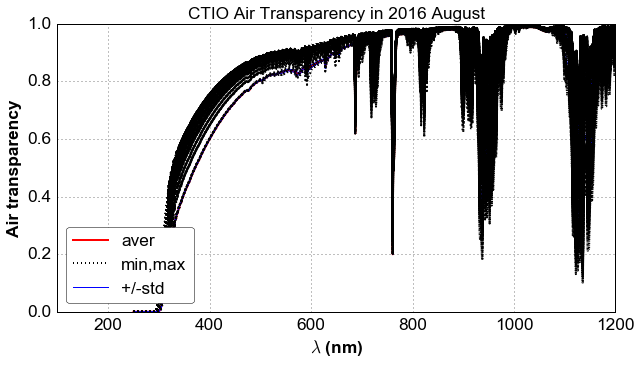

In [19]:
for idx,month in np.ndenumerate(months_y2016):
    title='CTIO Air Transparency in 2016 '+month_y2016_tag[month]
    figure='AirTransp_CTIO_Y2016_M'+month+'_sa'+'.jpg'
    PlotAirTransparencyOneMonth(filelist_2016[idx[0]],month_paths[idx[0]],title,figure)

In [ ]:
for idx,month in np.ndenumerate(months_y2016):
    title='Air Transparency Ratio '+airmass_sel_tag[airmass_selection]+' in '+month_y2016_tag[month]
    figure='RAirTransp_H2O_Y2016_M'+month+'_sa'+'.jpg'
    PlotRatioAirTransparencyOneMonth(filelist_2016[idx[0]],month_paths[idx[0]],title,figure)

In [ ]:
for idx,month in np.ndenumerate(months_y2016):
    title='Air Transparency Ratio '+airmass_sel_tag[airmass_selection]+' in '+month_y2016_tag[month]
    figure='RAirTransp_O3_Y2016_M'+month+'_sa'+'.jpg'
    PlotRatioAirTransparencyOneMonth(filelist_2016[idx[0]],month_paths[idx[0]],title,figure,YMIN=0.95,YMAX=1.05)

## B) Plot for all month the average transparency

In [ ]:
def PlotAirTransparencyAllMonth(filelist,title_name,fig_name,YMIN=0,YMAX=1):
    """
    PlotAirTransparencyAllMonth(filelist,title_name,fig_name,YMIN=0,YMAX=1)
    =======================================================================
    
    input:
    ------
        filelist
        title_name
        fig_name
    output:
    ------
    
    
    """
    plt.figure(figsize=(15, 6))
    idx=0
    for filename in filelist:
        data = np.loadtxt(filename)
        x=data[:,0]
        y=data[:,1]    
        plt.plot(x,y,'-',linewidth=0.5,label=months_y2016[idx]) 
        idx=idx+1
    
    plt.xlim(200,1200)
    plt.ylim(YMIN,YMAX)
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Air transparency')  
    plt.legend(loc=3)
    plt.title(title_name)
    plt.savefig(fig_name)

In [ ]:
def PlotRatioAirTransparencyAllMonth(filelist,aver,title_name,fig_name,YMIN=0,YMAX=1):
    """
    PlotRatioAirTransparencyAllMonth(filelist,average,title_name,fig_name,YMIN=0,YMAX=1)
    =======================================================================
    
    input:
    ------
        filelist
        title_name
        fig_name
    output:
    ------
    
    
    """
    plt.figure(figsize=(15, 6))
    idx=0
    for filename in filelist:
        data = np.loadtxt(filename)
        x=data[:,0]
        y=data[:,1] 
        wl=np.array(x)
        ratio=np.array(y)/aver
        plt.plot(wl,ratio,'-',linewidth=0.5,label=months_y2016[idx]) 
        idx=idx+1
    
    plt.xlim(200,1200)
    plt.ylim(YMIN,YMAX)
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Air transparency Ratio')  
    plt.legend(loc=3)
    plt.title(title_name)
    plt.savefig(fig_name)

In [ ]:
def GetAirTransparencyAverageAllMonth(filelist):
    """
    GetAirTransparencyAverageAllMonth(filelist)
    ===========================================
    
    input:
    ------
        filelist
        
    output:
    --------
    
    """
    idx=0
    for filename in filelist:
        data = np.loadtxt(filename)
        x=data[:,0]
        y=data[:,1]
        if idx==0:
            wl=np.array(x)
            sum=np.array(y)
        else:
            sum=sum+np.array(y)      
        idx=idx+1
        
    aver=sum/float(idx)
    return (wl,aver)

In [ ]:
selectedfiles = []
for idx,month in np.ndenumerate(months_y2016):
    filelistrootpath=os.listdir(month_paths[idx[0]]) 
    for filename in filelistrootpath:
        if re.search(airmass_selection,filename) and re.search('aver',filename):  #example of filename filter
            fullfilename=os.path.join(month_paths[idx[0]],filename)
            selectedfiles.append(fullfilename) 

In [ ]:
title='Air Transparency '+airmass_sel_tag[airmass_selection]
figure='AirTransp_H2O_Y2016_Mall'+'_sa'+'.jpg'
PlotAirTransparencyAllMonth(selectedfiles,title,figure,YMIN=0.2,YMAX=1)


In [ ]:
title='Air Transparency '+airmass_sel_tag[airmass_selection]
figure='AirTransp_O3_Y2016_Mall'+'_sa'+'.jpg'
PlotAirTransparencyAllMonth(selectedfiles,title,figure,YMIN=0.5,YMAX=1)



In [ ]:
(wl, aver)=GetAirTransparencyAverageAllMonth(selectedfiles)

In [ ]:
title='Air Transparency Ratio '+airmass_sel_tag[airmass_selection]
figure='RAirTransp_H2O_Y2016_Mall'+'_sa'+'.jpg'
PlotRatioAirTransparencyAllMonth(selectedfiles,aver,title,figure,YMIN=0.8,YMAX=1.2)

In [ ]:
title='Air Transparency Ratio '+airmass_sel_tag[airmass_selection]
figure='RAirTransp_O3_Y2016_Mall'+'_sa'+'.jpg'
PlotRatioAirTransparencyAllMonth(selectedfiles,aver,title,figure,YMIN=0.98,YMAX=1.02)